## Course Code: DS4003
## Course Name: Principles and Techniques for Data Science
## Lab Session: 04 - Dimensionality Reduction
Some contents of the lab are adapted from 
Learn.co Curriculum.

#### Objectives

You will be able to: 

- Practice performing PCA and t-SNE using the scikit-learn library
- Interpret the amount of variance captured by a given number of PCA components
- Evaluate the data structure with and without dimensionality reduction


## Your Task: Reduce the Dimensionality of the Iris Dataset 


### Dimensionality Reduction in ML

While it is possible to use dimensionality reduction as a standalone analysis technique, you will frequently see it used as a preprocessing step in data science workflows.

The two main reasons to use dimensionality reduction in machine learning are:

1. **Reducing computational complexity:** Often the internal logic of a data science methods means that the complexity increases by an order of magnitude with every additional dimension (feature). So maybe there are {n^2} operations for 2 features, {n^4} operations for 4 features, etc. If we can reduce the number of dimensions (features) prior to fitting/predicting with the model, the model will be faster and use fewer computational resources (memory, processing power, etc.)
2. **Improving performance:** In some cases even if we had unlimited computational capacity, our algorithms would still struggle to work on data with too many dimensions, known as the *curse of dimensionality*. Generally this applies when there are hundreds of features (or more). We can also sometimes see reductions in overfitting with dimensionality reduction, depending on the data and the algorithm.

There is no guarantee that dimensionality reduction will produce improved results in data science tasks — it all depends on how your features are related to each other, and the details of the algorithm you are using. In this lab you will walk through different dimensionality reduction techniques and observe their results on preserving the structure of the data.

### The Iris Dataset

For this lab you will use the Iris Dataset that comes with scikit-learn. This is a classic "toy" dataset where we are trying to identify the species of iris based on the provided attributes.

In [57]:
from sklearn import datasets
import pandas as pd
import numpy as np


iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.get('target')
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


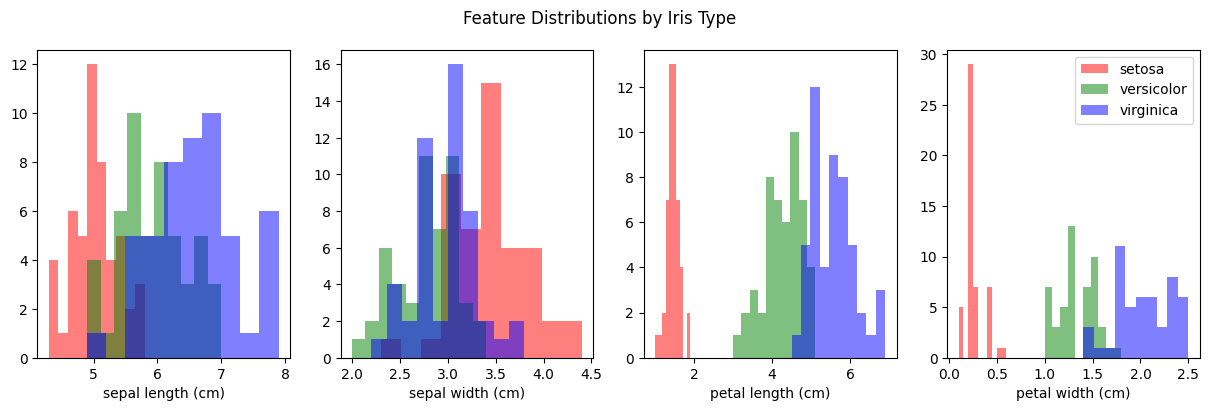

In [58]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 4, figsize=(15,4))

for feature_index, feature_name in enumerate(iris.feature_names):
    
    ax = axes[feature_index]
    ax.set_xlabel(feature_name)
    
    colors = ['r', 'g', 'b']
    for target_index, target_name in enumerate(iris.target_names):
        subset_rows = df[df["target"] == target_index]
        ax.hist(
            subset_rows[feature_name],
            label=target_name,    
            color=colors[target_index],
            alpha=0.5
        )
        
ax.legend()

fig.suptitle("Feature Distributions by Iris Type");

### Tasks

#### 1. Scale Data

To maintain uniformity in our analysis, we need to scale our data before performing anything else

#### 2. Perform and Visualize PCA on the iris dataset

Using the `PCA` transformer class from scikit-learn, fit and transform the data so that the four dimensions of the original features have been projected down to fewer dimensions. Identify how much of the variance is captured, and plot the data points using these two dimensions as the x-axis and y-axis.


#### 3. Perform and Visualize t-SNE on the iris dataset

Using the `t-SNE` transformer class from scikit-learn, fit and transform the data so that the  dimensions of the original features have been projected down to fewer dimensions. Identify how much of the variance is captured, and plot the data points using these two dimensions as the x-axis and y-axis.

## Task: Scale Data

Use the `StandardScaler` class from scikit-learn ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)) to implemnt a function to preprocess the data. Your.  function to scale the features only and not the target values. The scaled data should be named iris_new.

In [59]:
## YOUR CODE HERE 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

cols = df.columns[:4]
iris_new = pd.DataFrame(scaler.fit_transform(df[cols]))

for index, column_name in enumerate(cols):
    iris_new = iris_new.rename(columns={index:column_name})

iris_new['target'] = iris.get('target') 
iris_new.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0


## Task: Visualize the iris dataset.
Use a scatter plot to visualize the data. Show the different classes in the data.

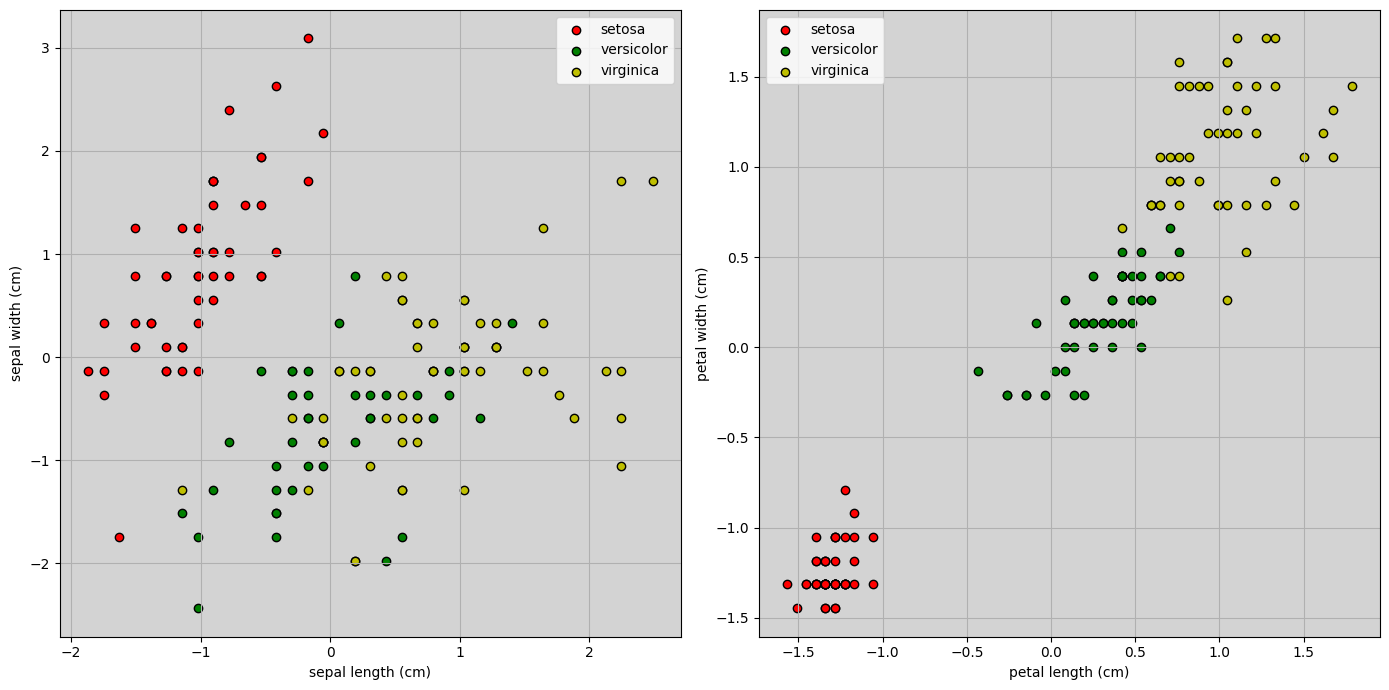

In [60]:
## YOUR CODE HERE


setosa = iris_new.loc[iris_new['target']==0]
versicolor = iris_new.loc[iris_new['target']==1]
virginica = iris_new.loc[iris_new['target']==2]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

ax1.scatter(x=setosa[cols[0]], 
           y= setosa[cols[1]],
           color='r', edgecolor='black', label='setosa')

ax1.scatter(x=versicolor[cols[0]], 
           y= versicolor[cols[1]],
           color='g', edgecolor='black', label='versicolor')

ax1.scatter(x=virginica[cols[0]], 
           y= virginica[cols[1]],
           color='y', edgecolor='black', label='virginica')

ax1.set_facecolor('lightgrey')
ax1.set_xlabel(cols[0])
ax1.set_ylabel(cols[1])
ax1.legend()
ax1.grid()

ax2.scatter(x=setosa[cols[2]], 
           y= setosa[cols[3]],
           color='r', edgecolor='black', label='setosa')

ax2.scatter(x=versicolor[cols[2]], 
           y= versicolor[cols[3]],
           color='g', edgecolor='black', label='versicolor')

ax2.scatter(x=virginica[cols[2]], 
           y= virginica[cols[3]],
           color='y', edgecolor='black', label='virginica')

ax2.set_facecolor('lightgrey')
ax2.set_xlabel(cols[2])
ax2.set_ylabel(cols[3])
ax2.legend()
ax2.grid()

plt.tight_layout()
plt.show()



Now let's investigate using PCA to reduce the dimensions of the data.

## Task: Perform and Visualize PCA

### Performing PCA

PCA can be applied relatively simply using the scikit-learn library. Just like with the `StandardScaler`, you'll need to instantiate a `PCA` transformer, fit it on the training data, and transform both the train and the test data. You can find documentation for the `PCA` class [here](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

We'll set `n_components` to `2`, meaning that we will only keep the first two principal components. Name it 'iris_pca'

In [61]:
# YOUR CODE HERE
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # Instantiate the PCA transformer with n_components=2

iris_pca = pca.fit_transform(iris_new.iloc[:,:4]) # Fit the transformer on the data

Now, our PCA-transformed X values should have the same number of rows as before, but a different number of columns:

In [62]:
# Run this cell 

# Same number of rows, different number of columns
assert iris_pca.shape[0] == iris_new.shape[0]
assert iris_pca.shape[1] != iris_new.shape[1]


assert iris_pca.shape[1] == 2 # Specifically, the transformed data should have 2 columns
# because we set n_components=2

pd.DataFrame(iris_pca, columns=["PC1", "PC2"])

,PC1,PC2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


### Visualizing Principal Components 

Using the target data, we can visualize the principal components according to the class distribution. 

Create a scatter plot from principal components, where the color of the dot is based on the target value.

First, separate `iris_pca` based on the associated target value in `target`. Create dataframes `setosa` (target = 0), `versicolor` (target = 1), and `virginica` (target = 2) using the dataframe created below.

In [63]:
# Run this cell 
iris_combined_pca = pd.DataFrame(iris_pca, columns=["PC1", "PC2"])
iris_combined_pca["target"] = iris_new["target"]
iris_combined_pca

,PC1,PC2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2


In [64]:
# Replace None with appropriate code

setosa = iris_new.loc[iris_combined_pca['target']==0]
versicolor = iris_new.loc[iris_combined_pca['target']==1]
virginica = iris_new.loc[iris_combined_pca['target']==2]

The code below checks that the dataframes have the correct length:

In [65]:
# Run this cell without changes
target_value_counts = iris_new['target'].value_counts()

assert len(setosa) == target_value_counts[0]
assert len(versicolor) == target_value_counts[1]
assert len(virginica) == target_value_counts[2]

Now we can set up the actual scatter plots.

Notes:

* You'll need to call `ax.scatter` three times, once with each of the types of iris.
* The x values passed in should be the values from the `"PC1"` column, whereas the y values should be the values from the `"PC2"` column.
* Set the color of `setosa` to red using `c='r'`, `versicolor` to green using `c='g'`, and `virginica` to blue using `c='b'`.

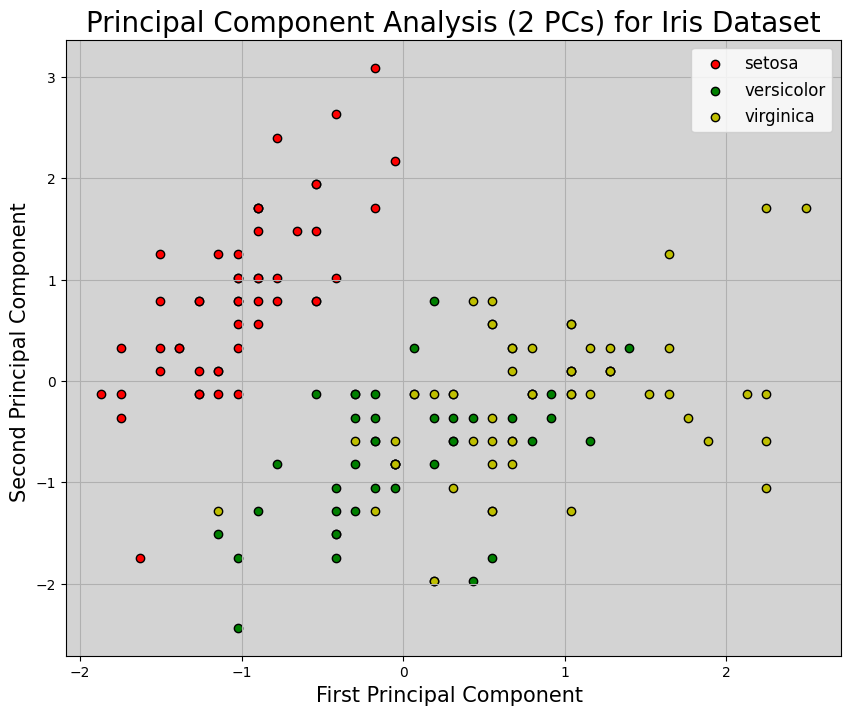

In [66]:
# Replace None with appropriate code

fig, ax = plt.subplots(figsize=(10, 8))

ax.scatter(x=setosa.iloc[:,0], 
           y= setosa.iloc[:,1],
           color='r', edgecolor='black', label='setosa')

ax.scatter(x=versicolor.iloc[:,0], 
           y= versicolor.iloc[:,1],
           color='g', edgecolor='black', label='versicolor')

ax.scatter(x=virginica.iloc[:,0], 
           y= virginica.iloc[:,1],
           color='y', edgecolor='black', label='virginica')


ax.set_facecolor('lightgrey')
ax.grid()
ax.set_xlabel('First Principal Component ', fontsize = 15)
ax.set_ylabel('Second Principal Component ', fontsize = 15)
ax.set_title('Principal Component Analysis (2 PCs) for Iris Dataset', fontsize = 20)
ax.legend(iris.target_names, fontsize="large")
plt.show()

### Task: Explained Variance

You should be able to see from the plot that the three classes in the dataset are fairly well separable, even though the data has been projected into two dimensions (down from 4 dimensions). As such, this compressed representation of the data is probably sufficient for downstream analysis.

Let's confirm this evaluation by extracting the explained variance ratio from the fitted `pca` object. It has an attribute `explained_variance_ratio_` that describes the amount of variance explained by each principal component. (Remember you can find the full PCA documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).)

In the cell below, extract that information from `pca`:

In [67]:
# Replace None with appropriate code

# How much of the variance is explaiend by PC1, PC2 etc. 
evr_all_components = pca.explained_variance_ratio_ # Extract the explained variance ratio from the pca object

pc1_evr = evr_all_components[0]
pc2_evr = evr_all_components[1]
print(f"The first principal component explains {round(pc1_evr*100, 3)}% of the variance")
print(f"The second principal component explains {round(pc2_evr*100, 3)}% of the variance")
print()
print(f"Overall, the first two principal components explain {round(sum(evr_all_components*100), 3)}% of the variance")

The first principal component explains 72.962% of the variance
The second principal component explains 22.851% of the variance

Overall, the first two principal components explain 95.813% of the variance


Alternatively, we can also plot the different values of components and visualize how much variance is explained by each number of components. Ideally, we should choose the number of components that explains 90-95% of the variance. To do this, we find the cumulative sum of explained_variance_ratio_.
The trick is that you have to fit pca to the data without specifying the number of components. In the cell below, fit pca to the iris data without specifying the number of components and visualize the cumulative sum of teh explained_variance_ratio_.

[75.55668679977259, 95.14469966894791, 98.85549567784888, 99.56146085144019, 99.99999999999997]


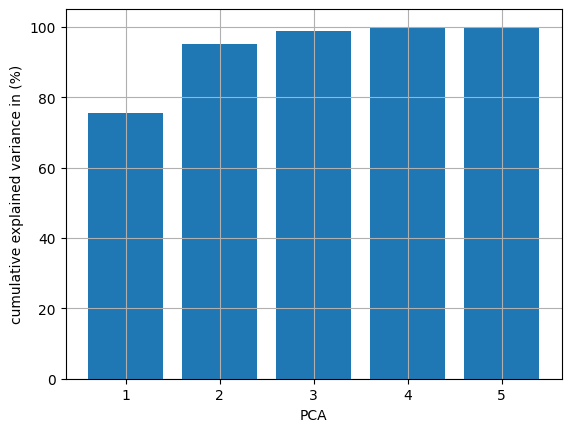

In [68]:
# Replace None with appropriate code

pca = PCA()
iris_pca = pca.fit(iris_new)

heights = []
current = 0
for varience in iris_pca.explained_variance_ratio_:
    current += varience*100
    heights.append(current)

print(heights)

plt.bar(height=heights, 
        x=[i+1 for i in range(iris_pca.n_components_)])
plt.xlabel('PCA')
plt.ylabel('cumulative explained variance in (%)')
plt.grid()
plt.show()

As you can see, the first two principal components account for the vast majority of the overall variance in the dataset. This is indicative of the total information encapsulated in the compressed representation (2 dimensions) compared to the original encoding (4 dimensions).

## Task: Perform and Visualize t-SNE

### Performing t-SNE

t-SNE can be applied relatively simply using the scikit-learn library. Just like with `PCA`, you'll need to instantiate a `t-SNE` transformer, fit it on the data, and transform the data. You can find documentation for the `t-SNE` class [here](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html).

We'll set `n_components` to `2`, meaning that we will reduce the data to two dimensions.

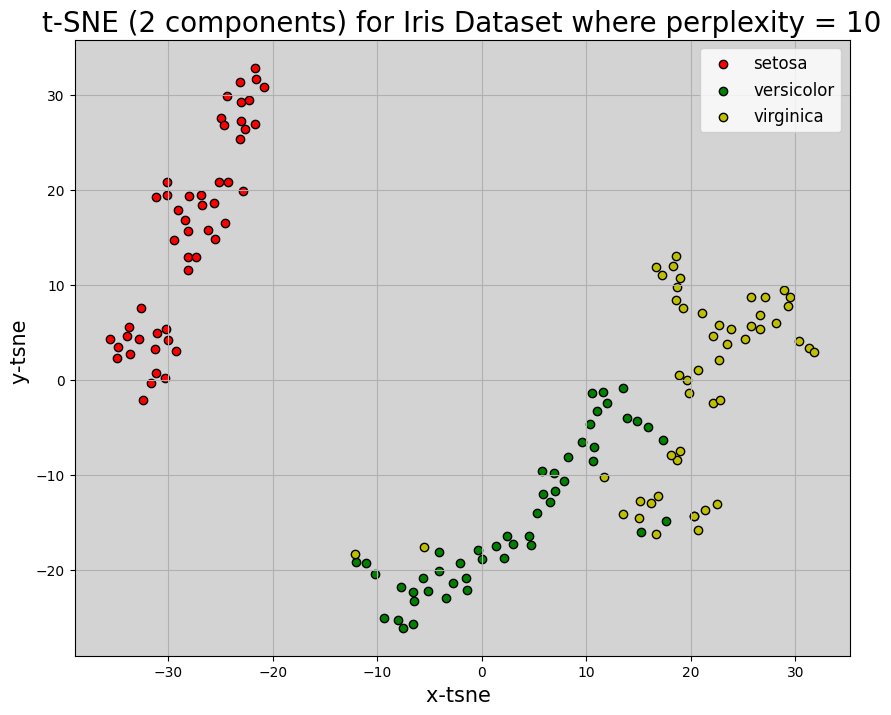

In [70]:
# YOUR CODE HERE


from sklearn.manifold import TSNE
perplexity = 10
tsne = TSNE(n_components=2, learning_rate='auto',
            perplexity=perplexity) # Instantiate the PCA transformer with n_components=2


iris_tsne = tsne.fit_transform(iris_new.iloc[:,:4]) # Fit the transformer on the data
iris_combined_tsne = pd.DataFrame(iris_tsne, columns=["tsne-X", "tsne-Y"])
iris_combined_tsne["target"] = iris_new["target"]



setosa = iris_combined_tsne.loc[iris_combined_tsne['target']==0]
versicolor = iris_combined_tsne.loc[iris_combined_tsne['target']==1]
virginica = iris_combined_tsne.loc[iris_combined_tsne['target']==2]




fig, ax = plt.subplots(figsize=(10, 8))

ax.scatter(x=setosa.iloc[:,0], 
           y= setosa.iloc[:,1],
           color='r', edgecolor='black', label='setosa')

ax.scatter(x=versicolor.iloc[:,0], 
           y= versicolor.iloc[:,1],
           color='g', edgecolor='black', label='versicolor')

ax.scatter(x=virginica.iloc[:,0], 
           y= virginica.iloc[:,1],
           color='y', edgecolor='black', label='virginica')

# Customize labels
ax.set_facecolor('lightgrey')
ax.grid()
ax.set_xlabel('x-tsne ', fontsize = 15)
ax.set_ylabel('y-tsne ', fontsize = 15)
ax.set_title(f't-SNE (2 components) for Iris Dataset where perplexity = {perplexity}', fontsize = 20)
ax.legend(iris.target_names, fontsize="large")
plt.show()

## Can you compare the visualizations from both methods. How are they different? Additionally, do they represent what we see in the data before diemensionality reduction?

## Summary 

In this lab, you applied PCA and t-SNE to the popular Iris Dataset in the context of dimensionality reduction. You looked at the results from both implementations and observed some differences in how the two methods represent the data.